# AutoViz

## Introduction

AutoViz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just a single line of code. The output is a fully self-contained HTML application.

The system is designed to quickly visualize target variables and compare datasets. Its goal is to facilitate rapid analysis of target characteristics, training vs testing data, and other data exploration tasks.

## AutoViz Features

- **Target analysis**  
  - Displays how a target variable (e.g., *Response* in a Marketing Campaign dataset) relates to other features  

- **Visualize and compare**  
  - Works seamlessly with different datasets (e.g., training vs test data)  
  - Can highlight intra-set characteristics (e.g., customer groups such as male vs female, or different age segments)  

- **Mixed-type associations**  
  - AutoViz automatically generates correlation heatmaps for numerical features and provides summaries for categorical and mixed-type data to capture key relationships.  

- **Type inference**  
  - Automatically detects numerical, categorical, and text features, with the option for manual overrides  

- **Summary information**  
  - Feature types, unique values, missing values, duplicate rows, most frequent values  
  - Numerical analysis:  
    - min/max/range  
    - quartiles  
    - mean, mode, median  
    - standard deviation  
    - sum  
    - median absolute deviation  
    - coefficient of variation  
    - kurtosis  
    - skewness  


## Installation

The best way to install AutoViz (other than from source) is to use pip:

In [2]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


## Basic usage

Creating a full report in AutoViz is a quick 2-line process:

1. Create an `AutoViz_Class` object.  
2. Call the `AutoViz()` function on your dataset (CSV file or DataFrame).  

The report will be automatically generated and displayed inside a Jupyter notebook.  
You can also export the report as an interactive **HTML file**, and adjust scaling for larger datasets.


## Import necessary libraries

In [3]:
import pandas as pd
from autoviz import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


## Demo

We will apply `autoviz` library on analyzing the Marketing Campaign dataset in order to get use to this technology

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



### Apply AutoViz

To use AutoViz, first create an instance of `AutoViz_Class()`.
Then, use the `AutoViz()` method with your `DataFrame` to display the result directly in the Jupyter notebook.
If you prefer to view the result as an HTML file, set `chart_format='html'` and specify a directory to save the output; it can then be opened in your browser.

Shape of your Data Set loaded: (2240, 29)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  15
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  2
    28 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID', 'Z_CostContact', 'Z_Revenue']

################ Binary_Class

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Year_Birth,int64,0.000000,2,1893.000000,1996.000000,Column has 3 outliers greater than upper bound (2004.00) or lower than lower bound(1932.00). Cap them or remove them.
Education,object,0.000000,0,,,No issue
Marital_Status,object,0.000000,0,,,"3 rare categories: ['Alone', 'Absurd', 'YOLO']. Group them into a single category or drop the categories."
Income,float64,1.166181,NA,1730.000000,666666.000000,"24 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 8 outliers greater than upper bound (117909.50) or lower than lower bound(-13900.50). Cap them or remove them."
Kidhome,int64,0.000000,0,0.000000,2.000000,No issue
Teenhome,int64,0.000000,0,0.000000,2.000000,No issue
Dt_Customer,object,0.000000,32,,,Possible high cardinality column with 663 unique values: Use hash encoding or text embedding to reduce dimension.
Recency,int64,0.000000,4,0.000000,99.000000,No issue
MntWines,int64,0.000000,37,0.000000,1493.000000,Column has 33 outliers greater than upper bound (1225.50) or lower than lower bound(-698.50). Cap them or remove them.
MntFruits,int64,0.000000,7,0.000000,199.000000,Column has 207 outliers greater than upper bound (81.00) or lower than lower bound(-47.00). Cap them or remove them.


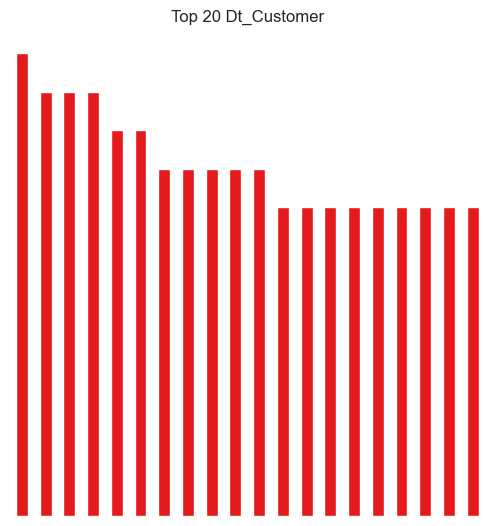

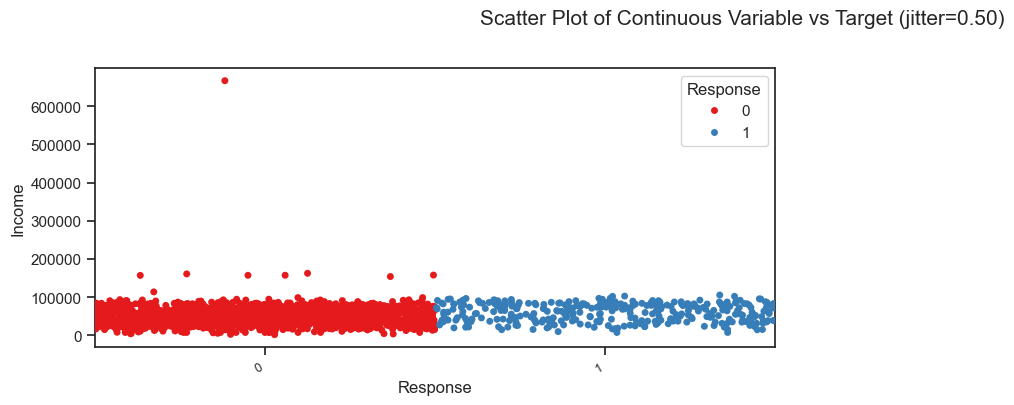

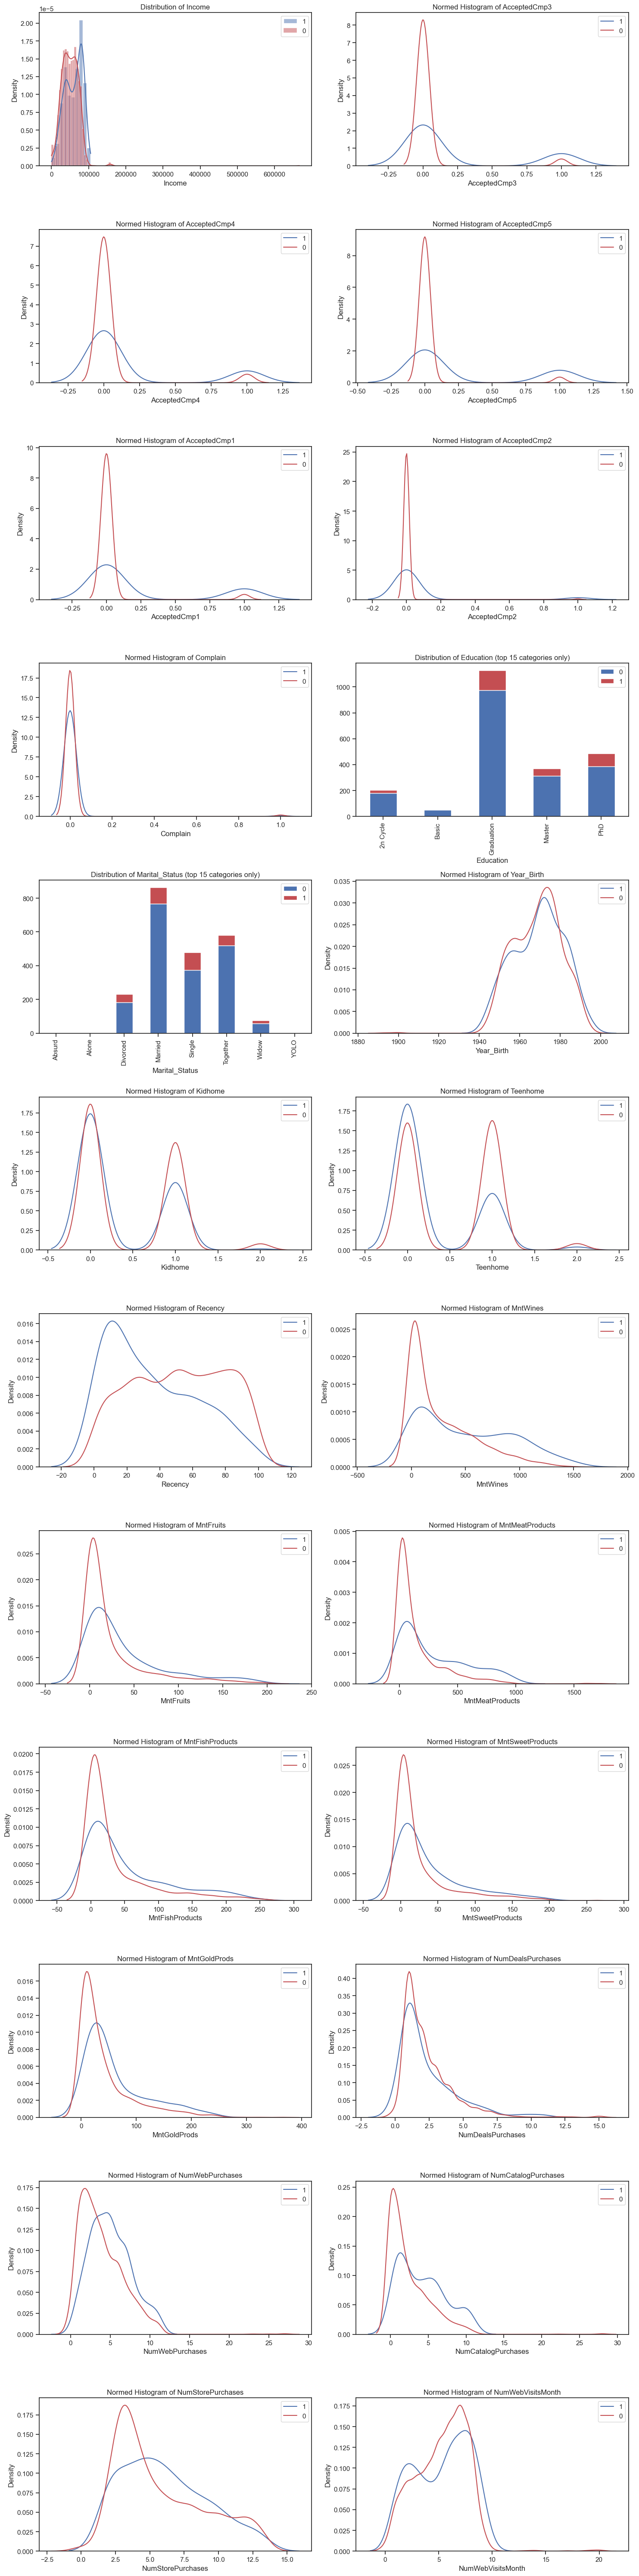

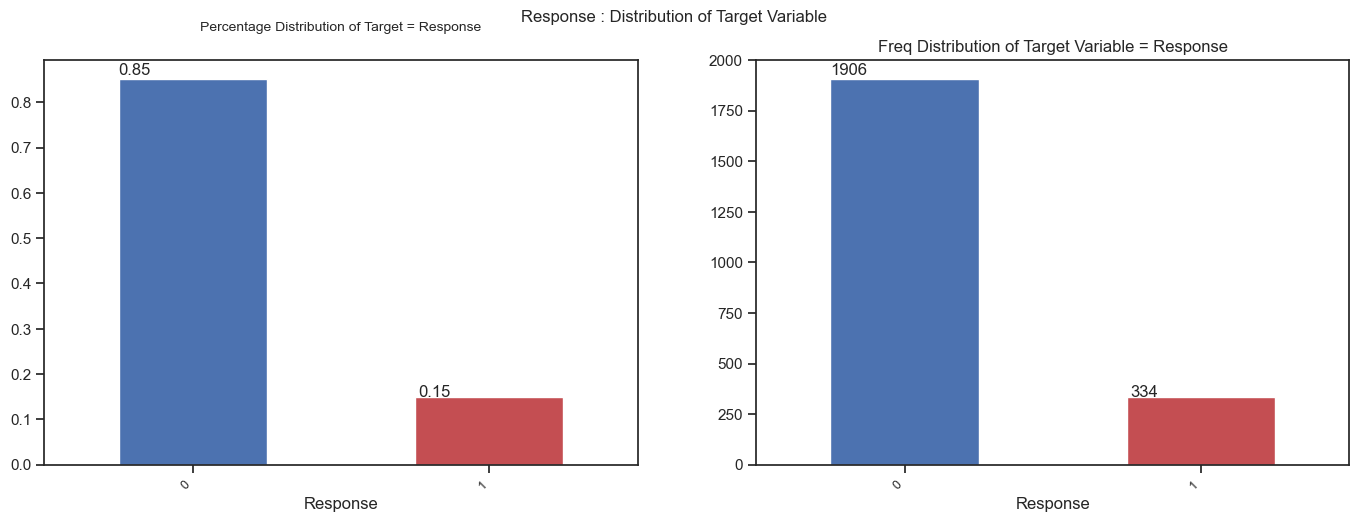

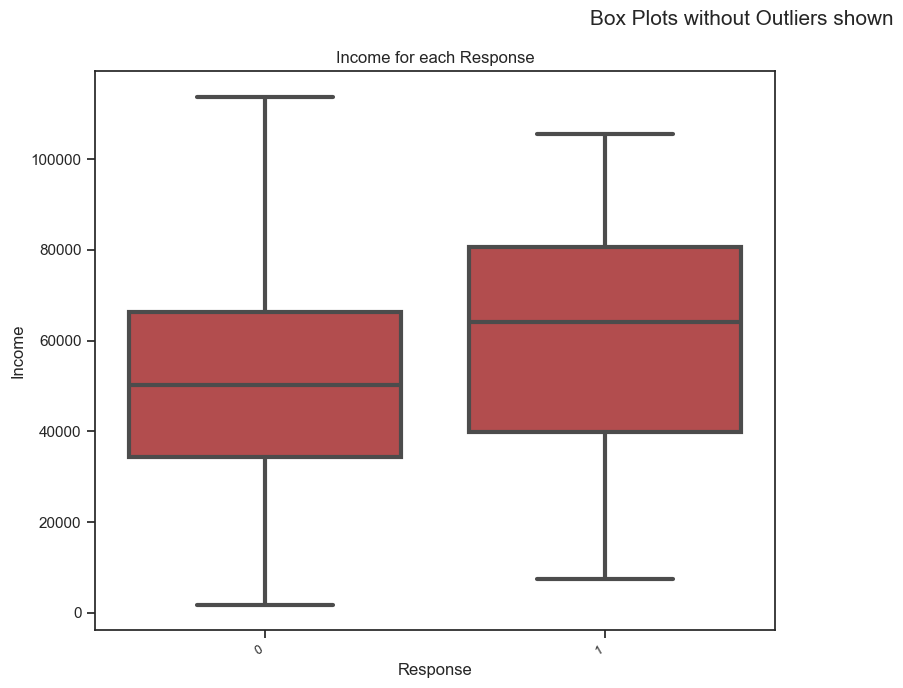

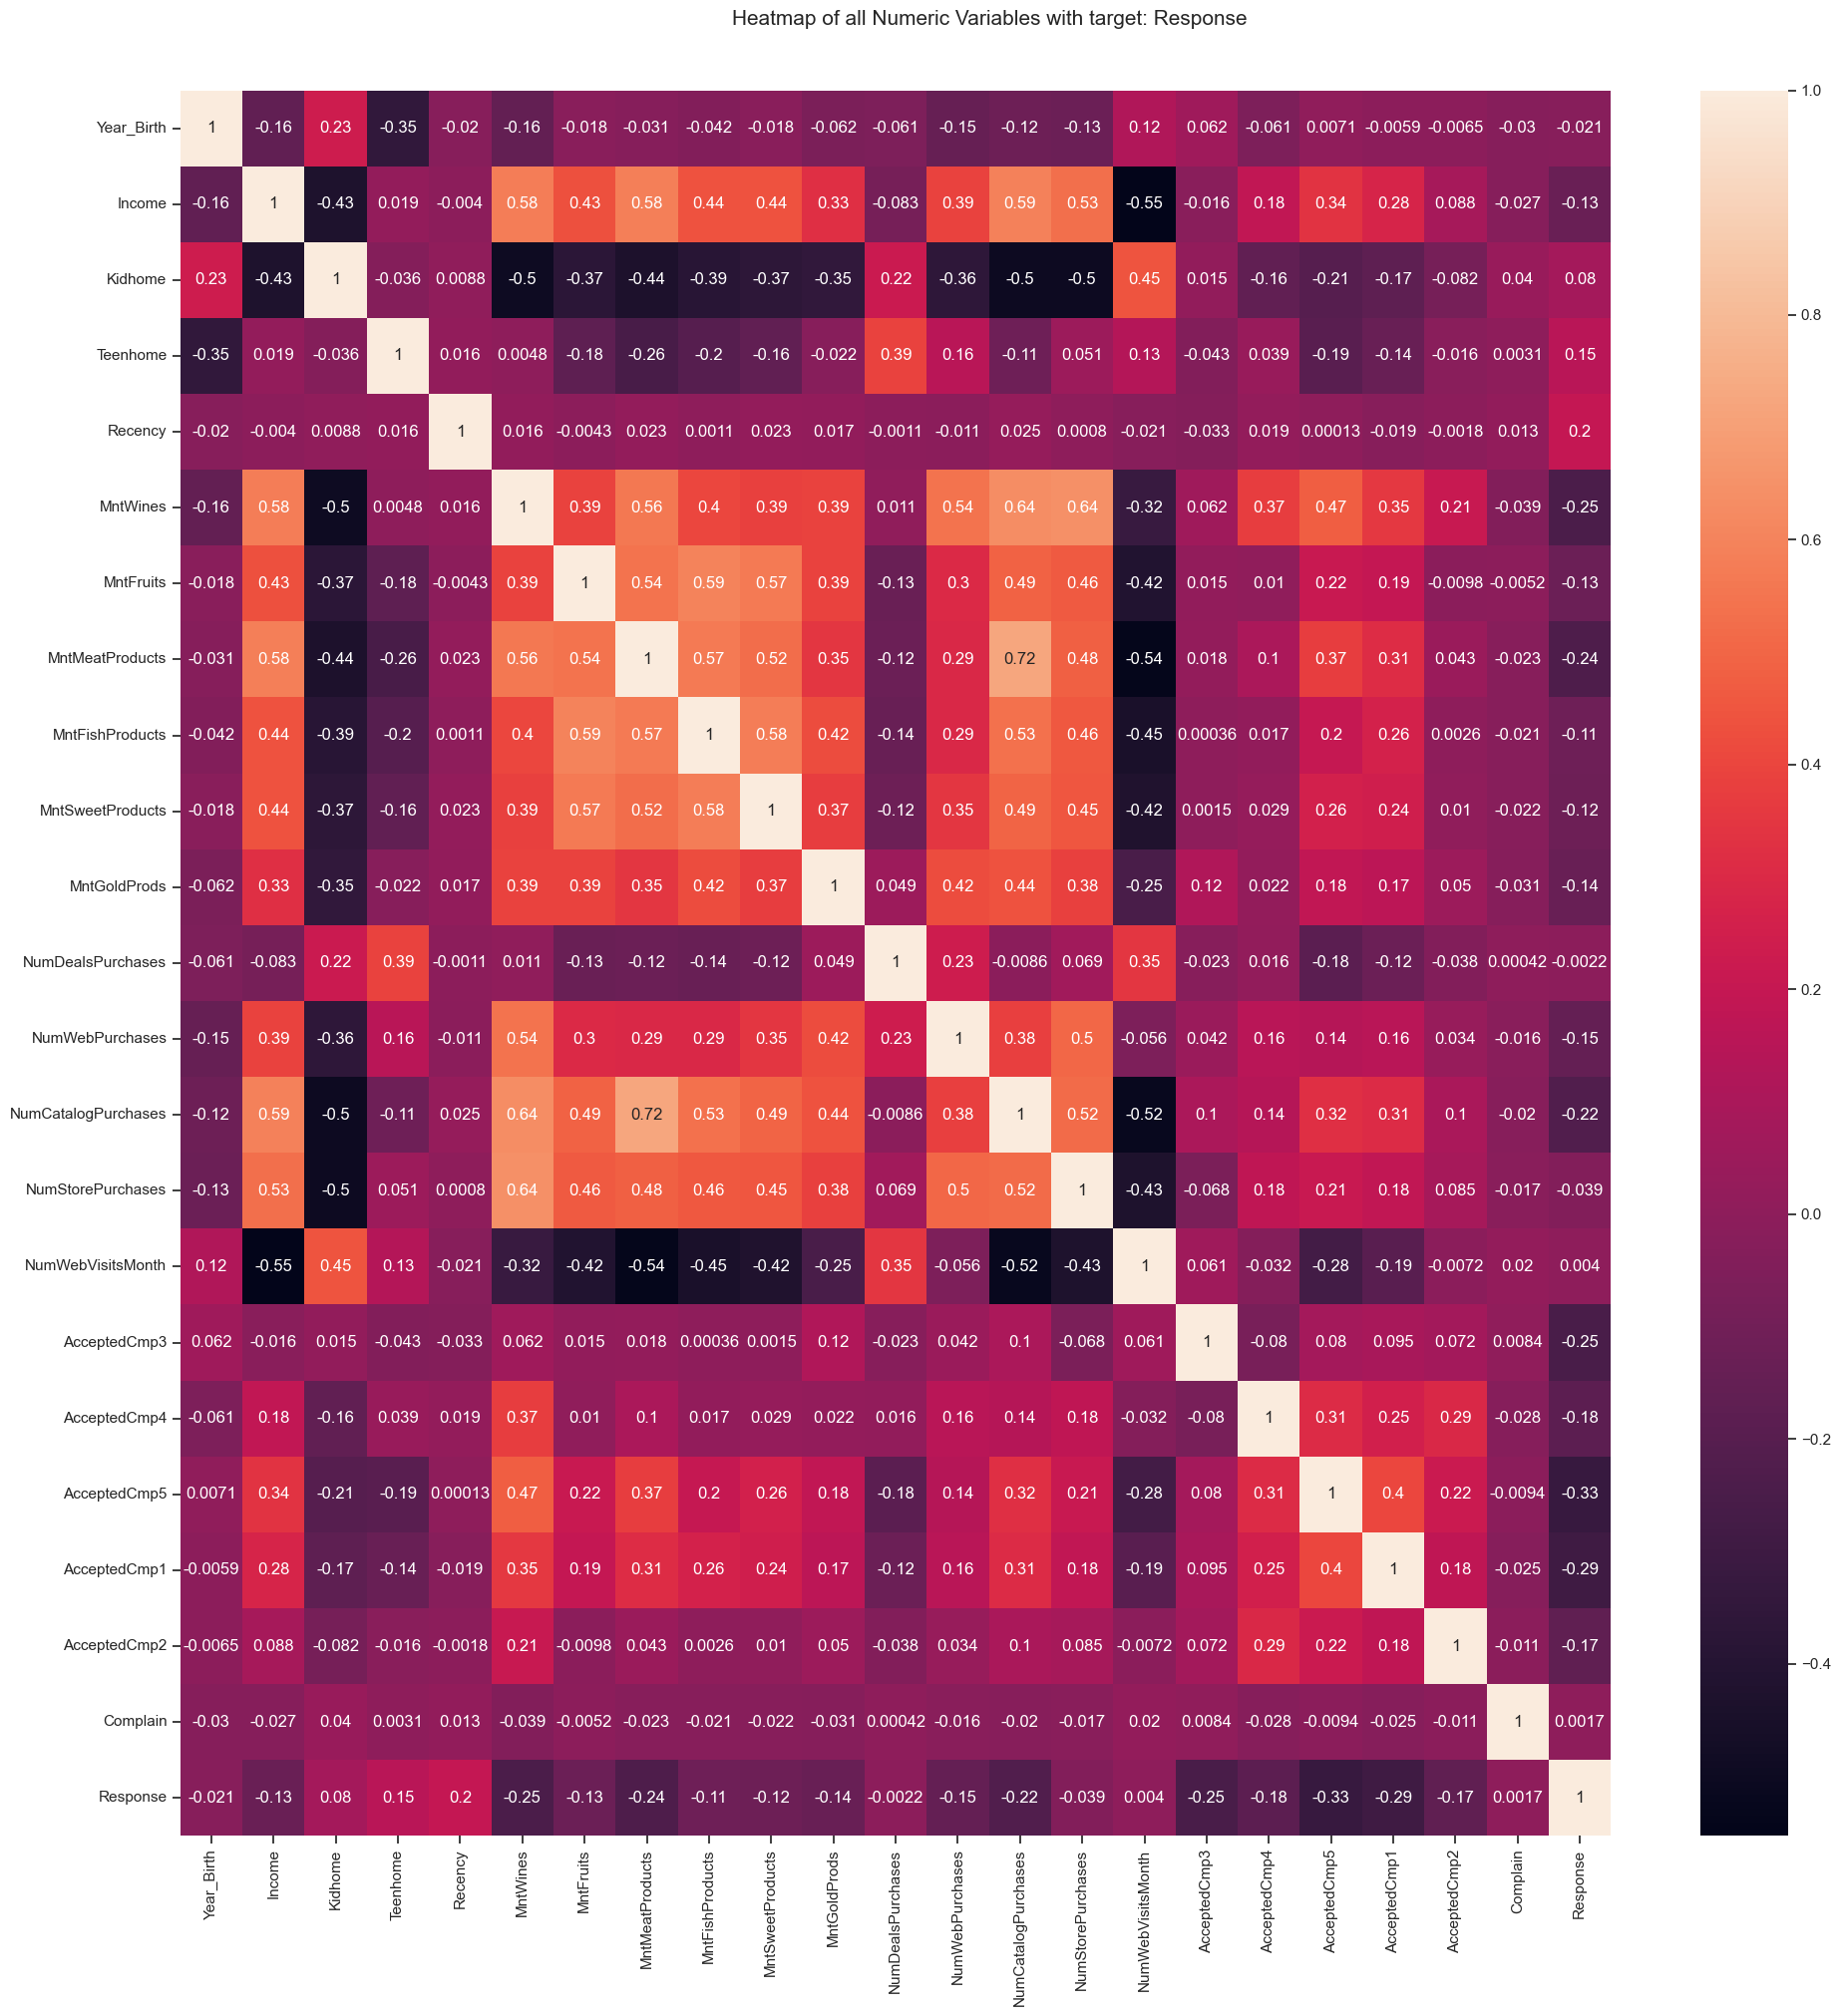

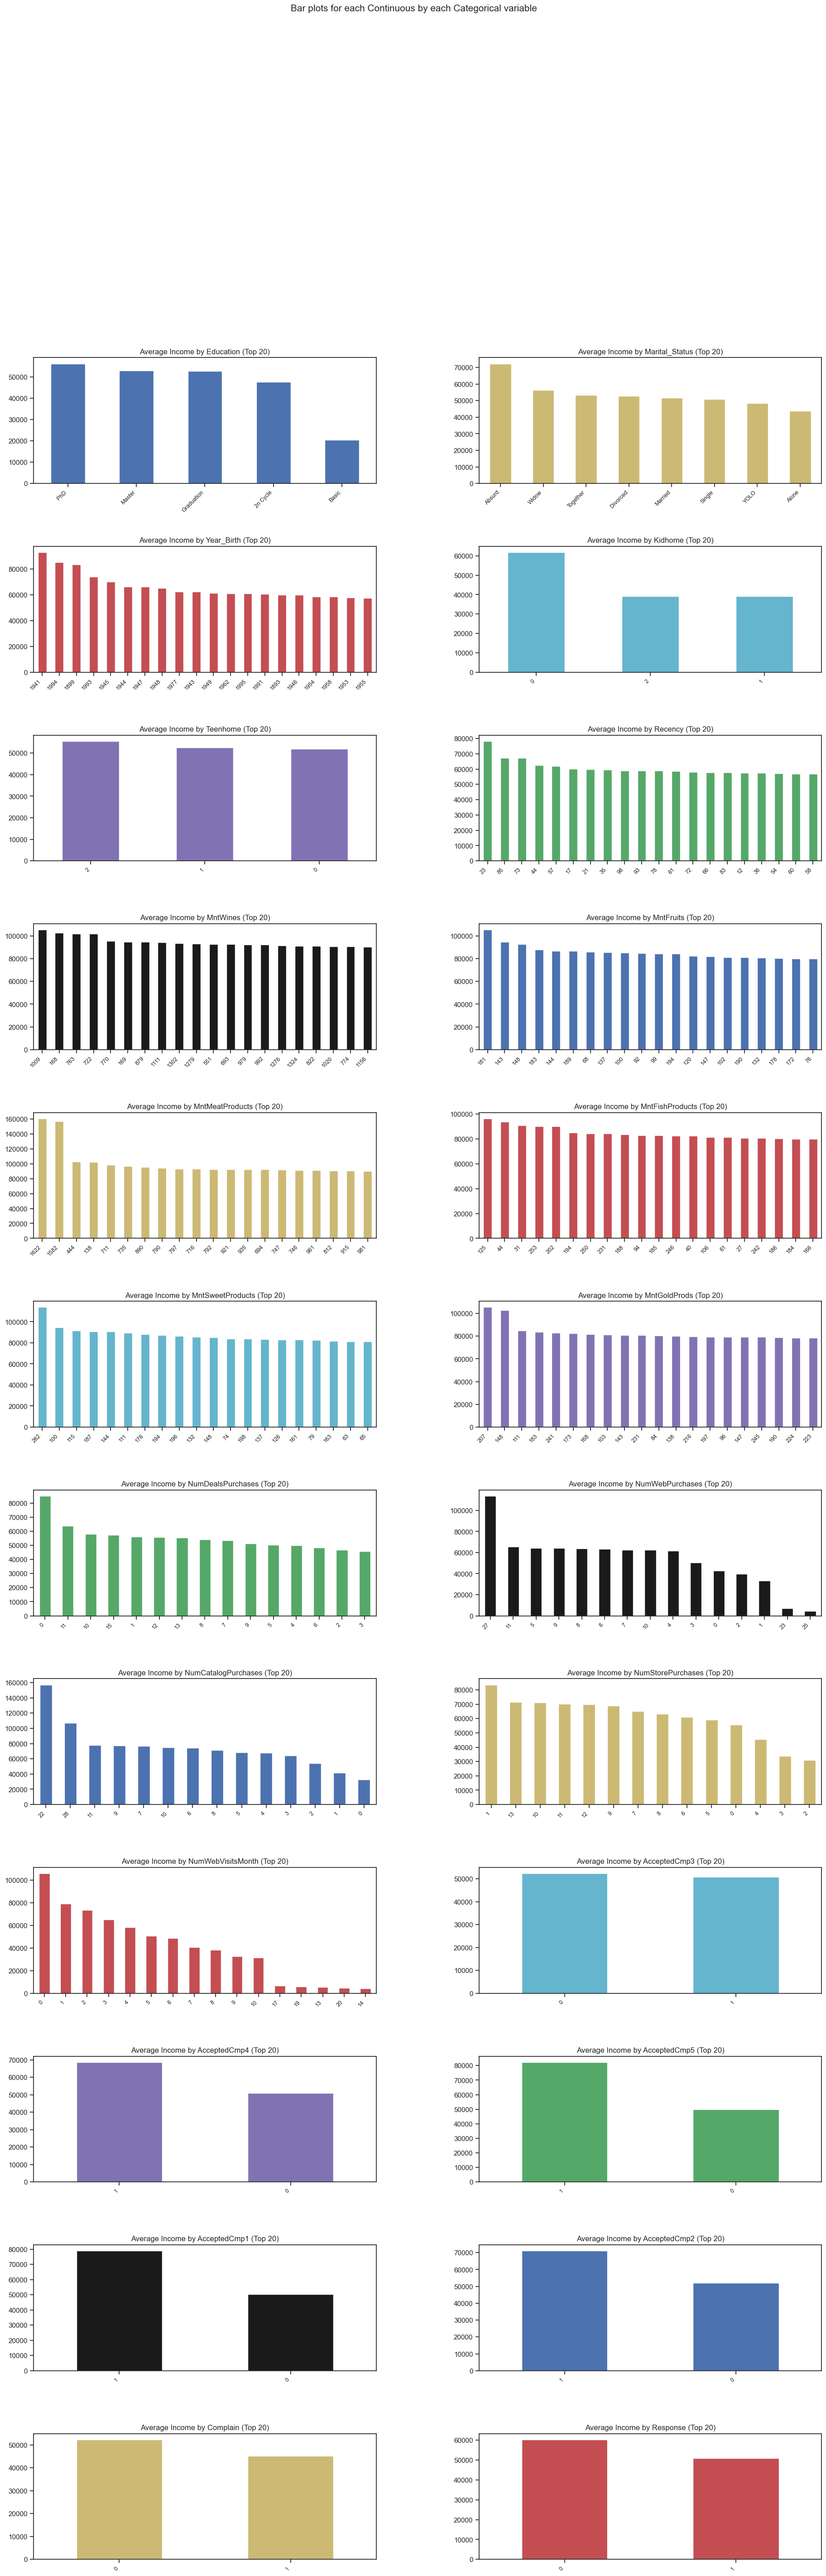

Could not draw wordcloud plot for Dt_Customer. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

In [7]:
AV = AutoViz_Class()

df = AV.AutoViz(
    filename="../Data/marketing_campaign.csv",
    sep="\t",                  # đúng là dấu ;
    depVar="Response",         # target column
    chart_format="notebook"    # hiển thị trực tiếp trong notebook
)
%matplotlib inline

### Notes on `Dt_Customer`

- The `Dt_Customer` column contains **663 unique values** in the dataset.  
- This is a **high cardinality column**, meaning most values appear only once.  
- AutoViz **cannot generate a wordcloud** for this column because it requires repeated words to visualize frequencies.  
- For analysis or machine learning, you may consider:
  - **Hash encoding** or **label encoding** for categorical processing.
  - **Text embedding** if treating as textual feature.
- For visualization purposes, you can instead show **top N values** with a bar chart:

In [6]:
top_values = df['Dt_Customer'].value_counts().head(20)
top_values.plot(kind='bar', figsize=(12,6), title="Top 20 Dt_Customer")

<Axes: title={'center': 'Top 20 Dt_Customer'}, xlabel='Dt_Customer'>

### Exploring AutoViz

AutoViz is a Python library for **Exploratory Data Analysis (EDA)** that automatically creates visualizations and interactive plots with minimal code.  
When running `AutoViz()` on a DataFrame, the report displays:

- **Dataset overview**: number of rows, columns, variable types, missing values, and high cardinality columns.  
- **Descriptive statistics** for each feature (mean, median, min, max, standard deviation, unique values, etc.).  
- **Feature distributions**: histograms for numeric features, bar charts for categorical features, and wordclouds for text features when applicable.  
- **Target analysis (if specified)**: comparison of feature distributions across target classes.  
- **Correlation between numeric variables**: a correlation heatmap to detect relationships.  
- **High cardinality handling**: flags columns with too many unique values and suggests hash encoding or embeddings for machine learning.  

This allows for a quick and visual understanding of the dataset before performing deeper analysis or building machine learning models.


# The end